<h1 style="text-align:center; font-weight:bold;">🎓 College Event Feedback Analysis</h1>


## 📂 Load Dataset

In [59]:
import os
import pandas as pd
import seaborn as sns
sns.set()

# Paths
base_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in globals() else os.getcwd()
DATA = os.path.join(base_dir, "data")

# Load CSV from data/ folder
df = pd.read_csv(os.path.join(DATA, "student_feedback.csv"))

print("Dataset loaded ✅")
print("Shape:", df.shape)          # Expect around (1001, 10)
df.head()

Dataset loaded ✅
Shape: (1001, 10)


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [27]:
print("\nInfo:")
print(df.info())                   # Expect integer columns

print("\nColumns:")
print(df.columns.tolist())



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   i

In [28]:
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nDuplicate rows:", df.duplicated().sum())



Missing values per column:
Unnamed: 0                                              0
Student ID                                              0
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64

Duplicate rows: 0


In [29]:
df.describe()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


## 🧹 Data Cleaning

In [30]:
# Remove index-like column if present
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

id_col = 'Student ID'
rating_cols = [c for c in df.columns if c != id_col]

print("Rating columns detected:")
for c in rating_cols:
    print("-", c)


Rating columns detected:
- Well versed with the subject
- Explains concepts in an understandable way
- Use of presentations
- Degree of difficulty of assignments
- Solves doubts willingly
- Structuring of the course
- Provides support for students going above and beyond
- Course recommendation based on relevance


In [31]:
out_of_range = {}
for c in rating_cols:
    n_bad = ((df[c] < 1) | (df[c] > 10)).sum()
    if n_bad:
        out_of_range[c] = n_bad

print("Out-of-range ratings:", out_of_range if out_of_range else "All ratings within 1–10 ✅")


Out-of-range ratings: All ratings within 1–10 ✅


In [32]:
df['Overall_Satisfaction'] = df[rating_cols].mean(axis=1)
df[['Student ID','Overall_Satisfaction']].head()


,Student ID,Overall_Satisfaction
0,340,5.000
1,253,4.875
2,680,4.375
3,806,5.875
4,632,7.500


In [33]:
import pandas as pd
import numpy as np
# Safe ensure df, id_col, rating_cols
try:
    df, id_col, rating_cols
except NameError:
    df = pd.read_csv('student_feedback.csv')
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    id_col = 'Student ID'
    rating_cols = [c for c in df.columns if c != id_col]
    df['Overall_Satisfaction'] = df[rating_cols].mean(axis=1)
# 1) Overall satisfaction stats
overall_mean   = float(df['Overall_Satisfaction'].mean())
overall_median = float(df['Overall_Satisfaction'].median())
overall_std    = float(df['Overall_Satisfaction'].std())
n = len(df)
# 2) Category-level metrics
cat_means = df[rating_cols].mean().sort_values(ascending=False)
cat_stds  = df[rating_cols].std().reindex(cat_means.index)
cat_mins  = df[rating_cols].min().reindex(cat_means.index)
cat_maxs  = df[rating_cols].max().reindex(cat_means.index)
# 3) Correlation matrix
corr = df[rating_cols].corr()
# 4) Satisfaction bands
bands = pd.cut(
    df['Overall_Satisfaction'],
    bins=[0, 4, 6, 8, 10],
    labels=['Poor (1-4)', 'Fair (4-6)', 'Good (6-8)', 'Excellent (8-10)'],
    include_lowest=True
)
band_counts = bands.value_counts().reindex(
    ['Poor (1-4)','Fair (4-6)','Good (6-8)','Excellent (8-10)']
).fillna(0).astype(int)
band_pct = (band_counts / n * 100).round(1)
# 5) Health report
health_report = {
    'rows': n,
    'overall_mean': round(overall_mean, 2),
    'overall_median': round(overall_median, 2),
    'overall_std': round(overall_std, 2),
    'top_category': cat_means.index[0],
    'top_category_mean': round(float(cat_means.iloc[0]), 2),      # ✅ fixed
    'bottom_category': cat_means.index[-1],
    'bottom_category_mean': round(float(cat_means.iloc[-1]), 2),  # ✅ fixed
    'satisfaction_bands_counts': band_counts.to_dict(),
    'satisfaction_bands_pct': band_pct.to_dict()
}
# ----- Display -----
print("= DATA UNDERSTANDING SUMMARY =")
print(f"Total responses: {n}")
print(f"Overall Satisfaction -> mean {overall_mean:.2f}, median {overall_median:.2f}, std {overall_std:.2f}\n")
print("Top 3 categories by average score:")
for i, (k, v) in enumerate(cat_means.head(3).items(), 1):
    print(f"{i}. {k}: {float(v):.2f}")
print("\nBottom 3 categories by average score:")
for i, (k, v) in enumerate(cat_means.tail(3).items(), 1):
    print(f"{i}. {k}: {float(v):.2f}")
print("\nSatisfaction bands (counts | %):")
for k in band_counts.index:
    print(f"- {k}: {int(band_counts[k])} | {band_pct[k]}%")
print("\nCategory dispersion (std) snapshot (highest variability):")
disp_snapshot = cat_stds.round(2).sort_values(ascending=False).head(5)
print(disp_snapshot.to_string())
print("\nCorrelation matrix (first 5x5 preview):")
display(corr.round(2).iloc[:5, :5])
print("\nhealth_report object ready for reuse ✅")
health_report

= DATA UNDERSTANDING SUMMARY =
Total responses: 1001
Overall Satisfaction -> mean 5.92, median 5.88, std 0.89

Top 3 categories by average score:
1. Well versed with the subject: 7.50
2. Explains concepts in an understandable way: 6.08
3. Use of presentations: 5.94

Bottom 3 categories by average score:
1. Course recommendation based on relevance: 5.60
2. Solves doubts willingly: 5.47
3. Degree of difficulty of assignments: 5.43

Satisfaction bands (counts | %):
- Poor (1-4): 16 | 1.6%
- Fair (4-6): 560 | 55.9%
- Good (6-8): 418 | 41.8%
- Excellent (8-10): 7 | 0.7%

Category dispersion (std) snapshot (highest variability):
Structuring of the course                               2.92
Provides support for students going above and beyond    2.89
Course recommendation based on relevance                2.89
Solves doubts willingly                                 2.87
Degree of difficulty of assignments                     2.87

Correlation matrix (first 5x5 preview):


,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly
Well versed with the subject,1.00,0.01,-0.02,-0.01,-0.06
Explains concepts in an understandable way,0.01,1.00,-0.01,0.03,-0.03
Use of presentations,-0.02,-0.01,1.00,0.02,-0.04
Degree of difficulty of assignments,-0.01,0.03,0.02,1.00,0.01
Solves doubts willingly,-0.06,-0.03,-0.04,0.01,1.00



health_report object ready for reuse ✅


{'rows': 1001,
 'overall_mean': 5.92,
 'overall_median': 5.88,
 'overall_std': 0.89,
 'top_category': 'Well versed with the subject',
 'top_category_mean': 7.5,
 'bottom_category': 'Degree of difficulty of assignments',
 'bottom_category_mean': 5.43,
 'satisfaction_bands_counts': {'Poor (1-4)': 16,
  'Fair (4-6)': 560,
  'Good (6-8)': 418,
  'Excellent (8-10)': 7},
 'satisfaction_bands_pct': {'Poor (1-4)': 1.6,
  'Fair (4-6)': 55.9,
  'Good (6-8)': 41.8,
  'Excellent (8-10)': 0.7}}

## 🧪 Data Preparation

In [45]:
import os
import pandas as pd
import numpy as np

# Paths
base_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in globals() else os.getcwd()
DATA   = os.path.join(base_dir, "data")
ASSETS = os.path.join(base_dir, "assets")
os.makedirs(ASSETS, exist_ok=True)

# 0) Safety: ensure df, id_col, rating_cols exist
try:
    df, id_col, rating_cols
except NameError:
    df = pd.read_csv(os.path.join(DATA, "student_feedback.csv"))
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    id_col = 'Student ID'
    rating_cols = [c for c in df.columns if c != id_col]
    df['Overall_Satisfaction'] = df[rating_cols].mean(axis=1)

print("Starting shape:", df.shape)

# 1) Standardize column names (optional readable slugs)
def slugify(s):
    return (s.strip()
              .replace("(", "")
              .replace(")", "")
              .replace("/", " ")
              .replace("&", "and")
              .replace("  ", " ")
              .lower()
              .replace(" ", "_"))

rename_map = {c: slugify(c) for c in df.columns}
df = df.rename(columns=rename_map)

# Update references after rename
id_col = slugify(id_col)
rating_cols = [c for c in df.columns if c not in [id_col, 'overall_satisfaction']]

# 2) Enforce integer type for ratings (and handle coercion if needed)
for c in rating_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce').astype('Int64')

# 3) Handle missing values (none expected, but robust)
missing_summary = df[rating_cols].isna().sum().sum()
if missing_summary > 0:
    for c in rating_cols:
        if df[c].isna().any():
            df[c] = df[c].fillna(df[c].median())
    print(f"Filled {missing_summary} missing values with category medians.")
else:
    print("No missing values in rating columns ✅")

# 4) Remove duplicates if any
before = len(df)
df = df.drop_duplicates()
removed = before - len(df)
print(f"Duplicates removed: {removed}")

# 5) Validate ranges (1–10); clip if any marginal issues found (rare)
out_of_range_counts = {}
for c in rating_cols:
    bad = ((df[c] < 1) | (df[c] > 10)).sum()
    if bad:
        out_of_range_counts[c] = int(bad)
        df[c] = df[c].clip(1, 10)
if out_of_range_counts:
    print("Out-of-range values detected and clipped:", out_of_range_counts)
else:
    print("All ratings within 1–10 ✅")

# 6) Recompute overall satisfaction (float)
df['overall_satisfaction'] = df[rating_cols].astype('float').mean(axis=1)

# 7) Create a tidy long-format table for plotting
tidy = (
    df[[id_col] + rating_cols]
      .melt(id_vars=[id_col], var_name='category', value_name='rating')
      .assign(rating=lambda d: d['rating'].astype(int))
)

# 8) Quick sanity prints
print("\nSchema after cleaning:")
print(df.dtypes.to_string())

print("\nTidy (long) format preview:")
display(tidy.head())

print("\nCounts by category (for plotting):")
display(tidy.groupby('category')['rating'].count().sort_values(ascending=False).head())

# 9) Save clean artifacts for later phases (to data/ directory)
df_out   = os.path.join(DATA, "student_feedback_clean.csv")
tidy_out = os.path.join(DATA, "student_feedback_tidy.csv")

os.makedirs(DATA, exist_ok=True)  # ensure folder exists
df.to_csv(df_out, index=False)
tidy.to_csv(tidy_out, index=False)

print(f"\nSaved: {df_out}")
print(f"Saved: {tidy_out} ✅")


Starting shape: (1001, 10)
No missing values in rating columns ✅
Duplicates removed: 0
All ratings within 1–10 ✅

Schema after cleaning:
student_id                                                int64
well_versed_with_the_subject                              Int64
explains_concepts_in_an_understandable_way                Int64
use_of_presentations                                      Int64
degree_of_difficulty_of_assignments                       Int64
solves_doubts_willingly                                   Int64
structuring_of_the_course                                 Int64
provides_support_for_students_going_above_and_beyond      Int64
course_recommendation_based_on_relevance                  Int64
overall_satisfaction                                    float64

Tidy (long) format preview:


,student_id,category,rating
0,340,well_versed_with_the_subject,5
1,253,well_versed_with_the_subject,6
2,680,well_versed_with_the_subject,7
3,806,well_versed_with_the_subject,9
4,632,well_versed_with_the_subject,8



Counts by category (for plotting):


category
course_recommendation_based_on_relevance                1001
degree_of_difficulty_of_assignments                     1001
explains_concepts_in_an_understandable_way              1001
provides_support_for_students_going_above_and_beyond    1001
solves_doubts_willingly                                 1001
Name: rating, dtype: int64


Saved: C:\Users\Huzaif\College event feedback Analysis\data\student_feedback_clean.csv
Saved: C:\Users\Huzaif\College event feedback Analysis\data\student_feedback_tidy.csv ✅
Phase 3 complete.


## 🔎 Exploratory Data Analysis (EDA)

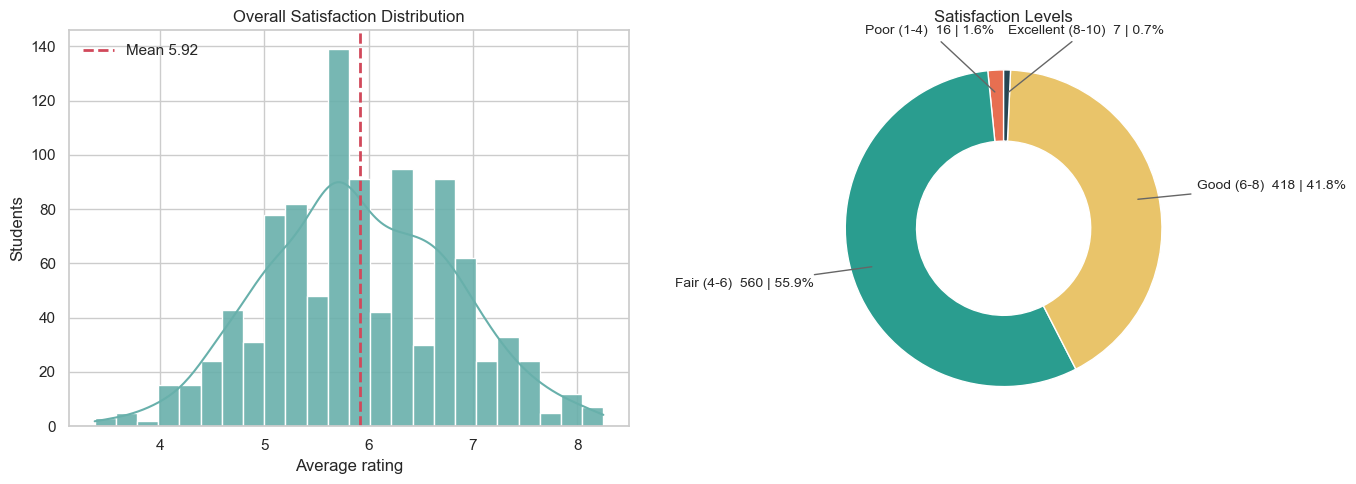

Saved: C:\Users\Huzaif\College event feedback Analysis\assets\viz_overall_bands.png


In [46]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use folder paths (no theme changes)
base_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in globals() else os.getcwd()
DATA   = os.path.join(base_dir, "data")
ASSETS = os.path.join(base_dir, "assets")
os.makedirs(ASSETS, exist_ok=True)

# Load clean data from data/
df = pd.read_csv(os.path.join(DATA, "student_feedback_clean.csv"))
overall = df['overall_satisfaction']

# Satisfaction bands
bands = pd.cut(
    overall, bins=[0,4,6,8,10],
    labels=['Poor (1-4)','Fair (4-6)','Good (6-8)','Excellent (8-10)'],
    include_lowest=True
)
band_counts = bands.value_counts().reindex(
    ['Poor (1-4)','Fair (4-6)','Good (6-8)','Excellent (8-10)']
).fillna(0)
band_pct = (band_counts/len(df)*100).round(1)

# Plot side-by-side (original light style)
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# LEFT: Histogram with KDE and mean line
sns.histplot(overall, bins=24, kde=True, color='#68b0ab', edgecolor='white', ax=axes[0], alpha=0.9)
axes[0].axvline(overall.mean(), color='#d1495b', linestyle='--', linewidth=2, 
                label=f"Mean {overall.mean():.2f}")
axes[0].set_title('Overall Satisfaction Distribution')
axes[0].set_xlabel('Average rating')
axes[0].set_ylabel('Students')
axes[0].legend(frameon=False, loc='upper left')

# RIGHT: Donut with external labels (prevents overlap)
labels = list(band_counts.index)
sizes = band_counts.values
colors = ['#E76F51','#2A9D8F','#E9C46A','#264653']  # Poor, Fair, Good, Excellent
wedges, _ = axes[1].pie(
    sizes, startangle=90, colors=colors,
    wedgeprops=dict(width=0.45, edgecolor='white')
)
axes[1].set_title('Satisfaction Levels')

# External labels with connectors
for i, w in enumerate(wedges):
    angle = (w.theta2 + w.theta1)/2
    x, y = np.cos(np.deg2rad(angle)), np.sin(np.deg2rad(angle))
    x_text, y_text = 1.25*x, 1.25*y
    ha = 'left' if x >= 0 else 'right'
    axes[1].annotate(
        f"{labels[i]}  {int(sizes[i])} | {band_pct.iloc[i]}%",
        xy=(0.85*x, 0.85*y), xytext=(x_text, y_text),
        arrowprops=dict(arrowstyle='-', color='#666', lw=1),
        ha=ha, va='center', fontsize=10
    )

plt.tight_layout()
plt.show()

# Save PNG to assets/ (same light style)
out_path = os.path.join(ASSETS, "viz_overall_bands.png")
fig.savefig(out_path, dpi=300, bbox_inches='tight')
print(f"Saved: {out_path}")


Saved: C:\Users\Huzaif\College event feedback Analysis\assets\viz_category_averages_enhanced.png


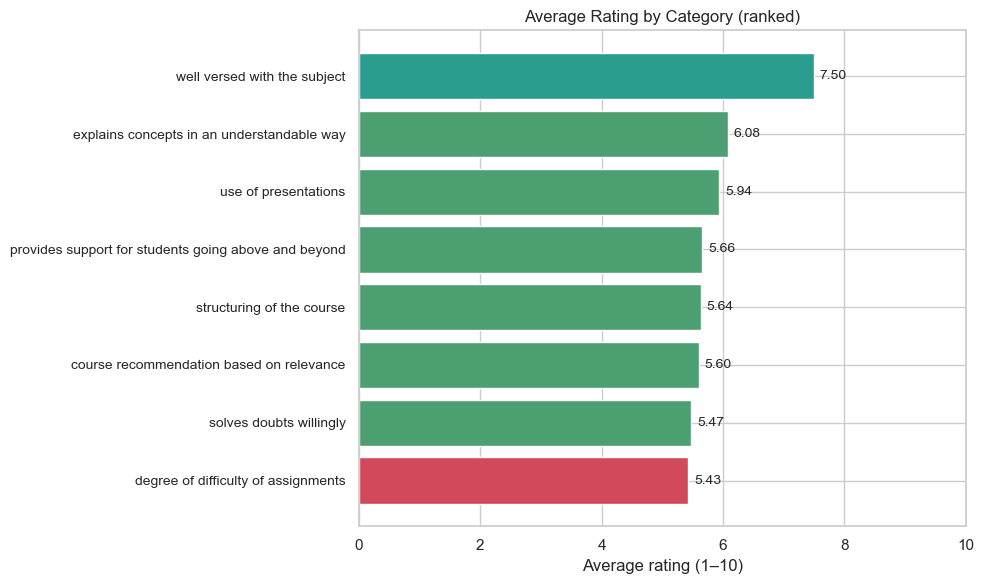

In [47]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paths
base_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in globals() else os.getcwd()
DATA   = os.path.join(base_dir, "data")
ASSETS = os.path.join(base_dir, "assets")
os.makedirs(ASSETS, exist_ok=True)

# Load clean data from data/
df = pd.read_csv(os.path.join(DATA, "student_feedback_clean.csv"))

rating_cols = [c for c in df.columns if c not in ['student_id','overall_satisfaction']]
cat_means = df[rating_cols].mean().sort_values(ascending=True)  # ascending for horizontal bars

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))

# Color-map: highlight top and bottom
colors = ['#4C9F70'] * len(cat_means)
colors[-1] = '#2A9D8F'  # highest
colors[0]  = '#D1495B'  # lowest

bars = plt.barh(range(len(cat_means)), cat_means.values, color=colors)
plt.yticks(range(len(cat_means)), [c.replace('_',' ') for c in cat_means.index], fontsize=10)
plt.xlabel('Average rating (1–10)')
plt.title('Average Rating by Category (ranked)')

# Value labels at end of bars
for bar, val in zip(bars, cat_means.values):
    plt.text(bar.get_width()+0.1, bar.get_y()+bar.get_height()/2, f"{val:.2f}", va='center', fontsize=10)

plt.xlim(0, 10)
plt.tight_layout()

# Save to assets/
out_path = os.path.join(ASSETS, "viz_category_averages_enhanced.png")
plt.savefig(out_path, dpi=300, bbox_inches='tight')
print(f"Saved: {out_path}")

plt.show()


Saved: C:\Users\Huzaif\College event feedback Analysis\assets\viz_corr_clean.png


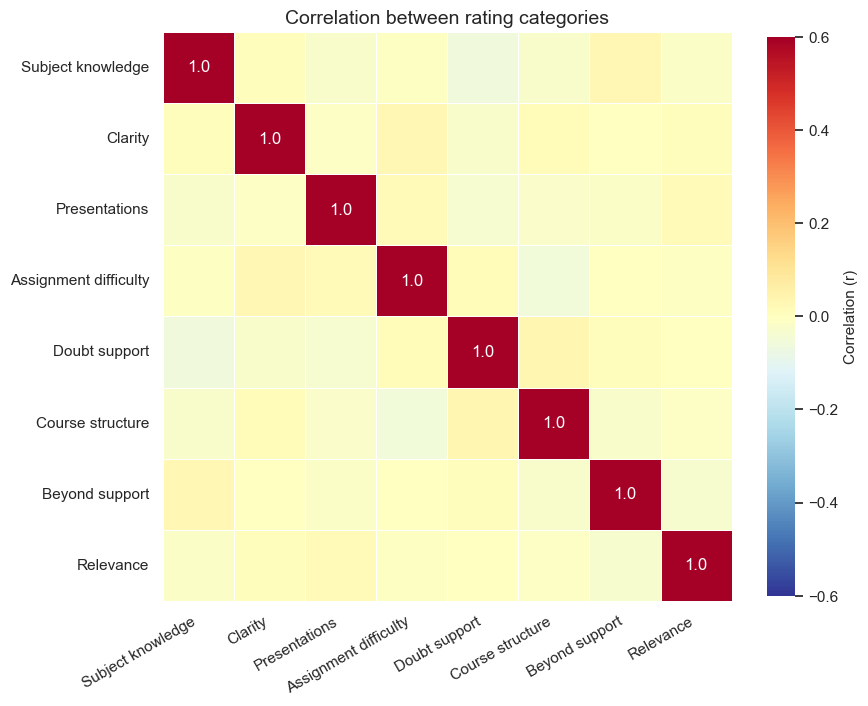

Saved: C:\Users\Huzaif\College event feedback Analysis\assets\viz_boxplots_clean.png


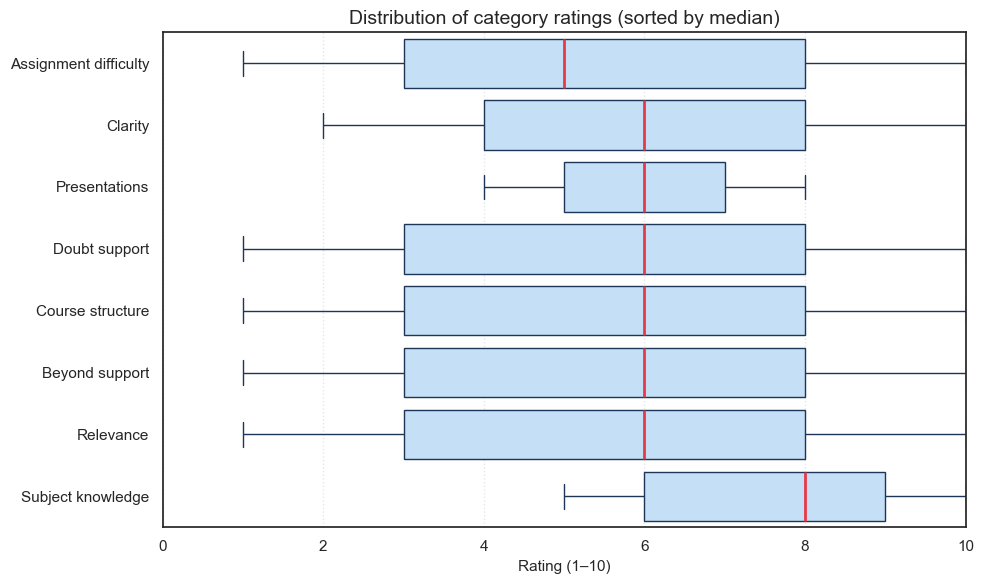

In [48]:
# Phase 4 – C (refined): Clean heatmap + readable boxplots — paths fixed

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paths
base_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in globals() else os.getcwd()
DATA   = os.path.join(base_dir, "data")
ASSETS = os.path.join(base_dir, "assets")
os.makedirs(ASSETS, exist_ok=True)

# Load
df = pd.read_csv(os.path.join(DATA, "student_feedback_clean.csv"))
rating_cols = [c for c in df.columns if c not in ['student_id','overall_satisfaction']]

# Helper: pretty labels
label_map = {
    'well_versed_with_the_subject': 'Subject knowledge',
    'explains_concepts_in_an_understandable_way': 'Clarity',
    'use_of_presentations': 'Presentations',
    'degree_of_difficulty_of_assignments': 'Assignment difficulty',
    'solves_doubts_willingly': 'Doubt support',
    'structuring_of_the_course': 'Course structure',
    'provides_support_for_students_going_above_and_beyond': 'Beyond support',
    'course_recommendation_based_on_relevance': 'Relevance',
}
pretty_cols = [label_map.get(c, c) for c in rating_cols]

# Compute correlation
corr = df[rating_cols].corr()
corr.index = pretty_cols
corr.columns = pretty_cols

sns.set_theme(style="white")
plt.rcParams.update({'axes.titlesize':14, 'axes.labelsize':11})

# 1) Correlation Heatmap (tall, clean)
plt.figure(figsize=(9, 8))
annot = corr.round(2).astype(str)
mask_small = corr.abs() < 0.10
annot = annot.mask(mask_small, "")
sns.heatmap(
    corr, cmap='RdYlBu_r', center=0, vmin=-0.6, vmax=0.6,
    annot=annot, fmt='', linewidths=0.5, linecolor='white',
    square=True, cbar_kws={'shrink':0.8, 'label':'Correlation (r)'}
)
plt.title('Correlation between rating categories')
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
# Save to assets/
heat_out = os.path.join(ASSETS, 'viz_corr_clean.png')
plt.savefig(heat_out, dpi=300, bbox_inches='tight')
print(f"Saved: {heat_out}")
plt.show()

# 2) Boxplots (horizontal, sorted by median)
med = df[rating_cols].median().sort_values(ascending=True)
ordered_cols = list(med.index)
ordered_pretty = [label_map.get(c, c) for c in ordered_cols]

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df[ordered_cols],
    orient='h',
    color='#BDE0FE',
    boxprops=dict(edgecolor='#1D3557'),
    medianprops=dict(color='#E63946', linewidth=2),
    whiskerprops=dict(color='#1D3557'),
    capprops=dict(color='#1D3557'),
    flierprops=dict(marker='o', markersize=2, markerfacecolor='#999', markeredgecolor='none')
)
plt.title('Distribution of category ratings (sorted by median)')
plt.xlabel('Rating (1–10)')
plt.yticks(ticks=range(len(ordered_pretty)), labels=ordered_pretty)
plt.xlim(0, 10)
plt.grid(axis='x', linestyle=':', alpha=0.5)
plt.tight_layout()
# Save to assets/
box_out = os.path.join(ASSETS, 'viz_boxplots_clean.png')
plt.savefig(box_out, dpi=300, bbox_inches='tight')
print(f"Saved: {box_out}")
plt.show()


## 💬 Sentiment Analysis

In [49]:
import os
import numpy as np
import pandas as pd

np.random.seed(42)

# Paths
base_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in globals() else os.getcwd()
DATA = os.path.join(base_dir, "data")
os.makedirs(DATA, exist_ok=True)

# Load clean data from data/
df = pd.read_csv(os.path.join(DATA, "student_feedback_clean.csv"))

rating_cols = [c for c in df.columns if c not in ['student_id','overall_satisfaction']]

def make_comment(row):
    # Pull a few signals
    clarity = row.get('explains_concepts_in_an_understandable_way', 6)
    difficulty = row.get('degree_of_difficulty_of_assignments', 5)
    support = row.get('solves_doubts_willingly', 6)
    struct  = row.get('structuring_of_the_course', 6)
    pres    = row.get('use_of_presentations', 6)

    bits = []

    # Clarity
    if clarity >= 7:
        bits.append(np.random.choice([
            "concepts are clear", "explanations are easy to follow",
            "teaching is clear and concise"
        ]))
    elif clarity <= 4:
        bits.append(np.random.choice([
            "concepts feel confusing", "need clearer explanations",
            "struggled to follow some topics"
        ]))

    # Difficulty
    if difficulty >= 7:
        bits.append(np.random.choice([
            "assignments are too hard", "workload feels heavy",
            "tasks felt challenging"
        ]))
    elif difficulty <= 3:
        bits.append(np.random.choice([
            "assignments are manageable", "workload is reasonable",
            "tasks are fair"
        ]))

    # Support
    if support >= 7:
        bits.append(np.random.choice([
            "doubt solving is helpful", "got quick support",
            "mentor support is good"
        ]))
    elif support <= 4:
        bits.append(np.random.choice([
            "need more support for doubts", "slow response to queries",
            "hard to get help when needed"
        ]))

    # Structure/Presentations
    if struct <= 4:
        bits.append(np.random.choice([
            "course needs better structure", "unclear weekly plan"
        ]))
    if pres <= 4:
        bits.append(np.random.choice([
            "slides could be improved", "presentations are text-heavy"
        ]))
    elif pres >= 7:
        bits.append(np.random.choice([
            "slides are helpful", "presentations add value"
        ]))

    if not bits:
        bits.append(np.random.choice([
            "overall okay experience", "decent course",
            "good learning experience"
        ]))

    # Tag as synthetic
    return "SYNTHETIC: " + "; ".join(bits)

df['comments'] = df.apply(make_comment, axis=1)

# Save to data/ folder
out_path = os.path.join(DATA, 'student_feedback_with_comments_synthetic.csv')
df.to_csv(out_path, index=False)
print(f"Added synthetic comments -> {out_path}")


Added synthetic comments -> C:\Users\Huzaif\College event feedback Analysis\data\student_feedback_with_comments_synthetic.csv


Saved: C:\Users\Huzaif\College event feedback Analysis\assets\fig_wordcloud_synthetic.png ✅


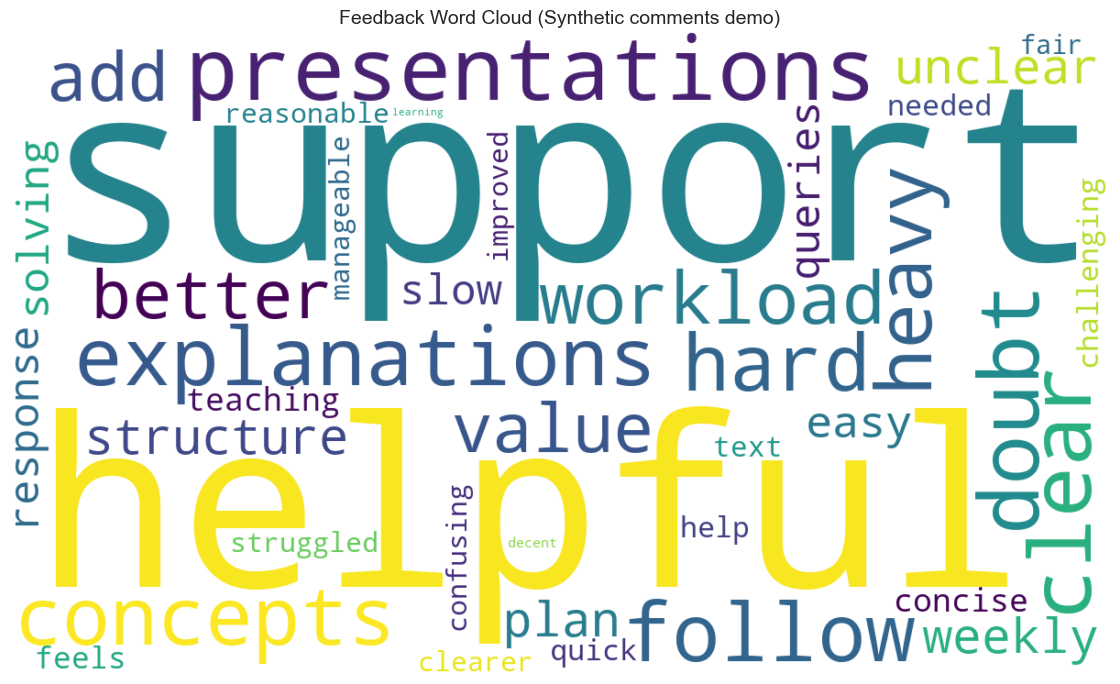

In [50]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import os

# Paths
base_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in globals() else os.getcwd()
DATA   = os.path.join(base_dir, "data")
ASSETS = os.path.join(base_dir, "assets")
os.makedirs(ASSETS, exist_ok=True)

# Load from data/
df = pd.read_csv(os.path.join(DATA, 'student_feedback_with_comments_synthetic.csv'))
text = " ".join(df['comments'].dropna().astype(str))

# Build stopwords: default + synthetic marker + filler/domain words
extra_stops = {
    'synthetic','are','is','was','were','feel','felt','got','need','needs',
    'good','okay','overall','experience','class','course','subject','topics',
    'assignments','slides','tasks','mentor','students'
}
stopwords = set(STOPWORDS) | extra_stops

wc = WordCloud(
    width=1200, height=700, background_color='white',
    stopwords=stopwords, collocations=False
).generate(text)

plt.figure(figsize=(12,7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Feedback Word Cloud (Synthetic comments demo)')
plt.tight_layout()

# Save into assets/
out_path = os.path.join(ASSETS, 'fig_wordcloud_synthetic.png')
plt.savefig(out_path, dpi=300, bbox_inches='tight')
print(f"Saved: {out_path} ✅")

plt.show()


Saved: C:\Users\Huzaif\College event feedback Analysis\assets\fig_sentiment_synthetic_donut_pretty.png


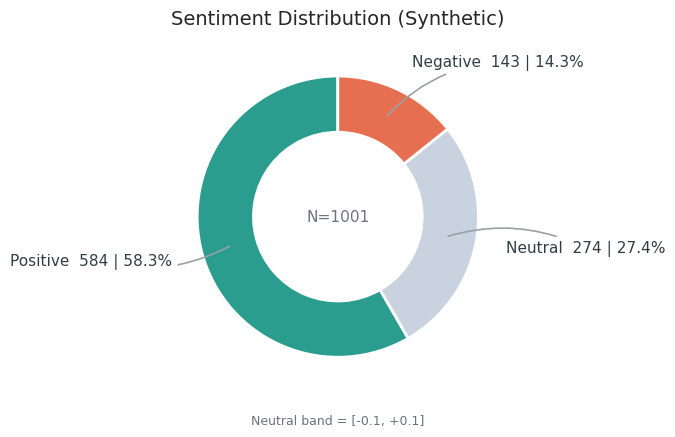

In [52]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Paths
base_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in globals() else os.getcwd()
DATA   = os.path.join(base_dir, "data")
ASSETS = os.path.join(base_dir, "assets")
os.makedirs(ASSETS, exist_ok=True)

# Load from data/
df = pd.read_csv(os.path.join(DATA, 'student_feedback_with_comments_synthetic.csv'))

# Sentiment scoring and labels
df['sentiment_polarity'] = df['comments'].fillna('').apply(lambda x: TextBlob(str(x)).sentiment.polarity)
label = lambda p: 'Positive' if p > 0.1 else ('Negative' if p < -0.1 else 'Neutral')
df['sentiment_label'] = df['sentiment_polarity'].apply(label)

order  = ['Positive','Neutral','Negative']
counts = df['sentiment_label'].value_counts().reindex(order).fillna(0).astype(int)
pct    = (counts/len(df)*100).round(1)

labels = order
sizes  = counts.values
colors = ['#2A9D8F', '#C9D3DF', '#E76F51']  # teal / soft steel / coral

plt.rcParams.update({'font.family':'DejaVu Sans','axes.titlesize':14})
fig, ax = plt.subplots(figsize=(6.8,6.8), facecolor='white')

wedges, _ = ax.pie(
    sizes, startangle=90, colors=colors,
    wedgeprops=dict(width=0.40, edgecolor='white', linewidth=2)
)
ax.set_title('Sentiment Distribution (Synthetic)', pad=12)

# Outside labels with soft connectors
for i, w in enumerate(wedges):
    ang = (w.theta2 + w.theta1)/2
    x, y = np.cos(np.deg2rad(ang)), np.sin(np.deg2rad(ang))
    ax.annotate(
        f"{labels[i]}  {int(sizes[i])} | {pct.iloc[i]}%",
        xy=(0.78*x, 0.78*y),
        xytext=(1.22*x, 1.22*y),
        arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=0.2',
                        color='#99A1A8', lw=1.2),
        ha=('left' if x>=0 else 'right'), va='center', fontsize=11, color='#2F3E46'
    )

# Center text and caption
ax.text(0, 0, f"N={len(df)}", ha='center', va='center', fontsize=11, color='#6B7280')
ax.text(0.5, -0.08, "Neutral band = [-0.1, +0.1]", transform=ax.transAxes,
        ha='center', va='center', fontsize=9, color='#6B7280')

plt.tight_layout()

# Save into assets/
out_path = os.path.join(ASSETS, 'fig_sentiment_synthetic_donut_pretty.png')
plt.savefig(out_path, dpi=300, bbox_inches='tight')
print(f"Saved: {out_path}")

plt.show()


## 🔬 Inferential Analysis & Cohort Discovery

In [36]:
import os
import pandas as pd
from scipy import stats

# Paths
base_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in globals() else os.getcwd()
DATA = os.path.join(base_dir, "data")

# Load clean data from data/
df = pd.read_csv(os.path.join(DATA, "student_feedback_clean.csv"))

rating_cols = [c for c in df.columns if c not in ['student_id','overall_satisfaction']]

# Prepare samples for ANOVA
samples = [df[col].values for col in rating_cols]

f_stat, p_val = stats.f_oneway(*samples)
print("= ONE-WAY ANOVA (Category means) =")
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.6f}")

if p_val < 0.05:
    print("Result: Significant differences exist between at least two categories (p<0.05).")
else:
    print("Result: No statistically significant difference in means (p>=0.05).")

# Optional: print category means for context
means = df[rating_cols].mean().sort_values(ascending=False).round(2)
print("\nCategory means (descending):")
print(means.to_string())


=== ONE-WAY ANOVA (Category means) ===
F-statistic: 68.711
P-value: 0.000000
Result: Significant differences exist between at least two categories (p<0.05).

Category means (descending):
well_versed_with_the_subject                            7.50
explains_concepts_in_an_understandable_way              6.08
use_of_presentations                                    5.94
provides_support_for_students_going_above_and_beyond    5.66
structuring_of_the_course                               5.64
course_recommendation_based_on_relevance                5.60
solves_doubts_willingly                                 5.47
degree_of_difficulty_of_assignments                     5.43


In [53]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Paths
base_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in globals() else os.getcwd()
DATA = os.path.join(base_dir, "data")
os.makedirs(DATA, exist_ok=True)

# Load clean data from data/
df = pd.read_csv(os.path.join(DATA, "student_feedback_clean.csv"))

rating_cols = [c for c in df.columns if c not in ['student_id','overall_satisfaction']]

X = df[rating_cols].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means with 3 clusters (you can try 2–5 as sensitivity)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

# Cluster-level profiles
cluster_sizes = df['cluster'].value_counts().sort_index()
cluster_means = df.groupby('cluster')[rating_cols + ['overall_satisfaction']].mean().round(2)

print("= CLUSTER SIZES =")
for c, sz in cluster_sizes.items():
    print(f"Cluster {c}: {sz} students")

print("\n= CLUSTER PROFILES (means) =")
display(cluster_means)

# Simple labels based on overall satisfaction thresholds
labels = {}
for c, avg in df.groupby('cluster')['overall_satisfaction'].mean().items():
    if avg >= 6.8:
        labels[c] = 'Highly satisfied'
    elif avg >= 5.8:
        labels[c] = 'Moderately satisfied'
    else:
        labels[c] = 'Needs attention'

print("\n= CLUSTER LABELS =")
for c in sorted(labels):
    print(f"Cluster {c}: {labels[c]} (avg overall_satisfaction={df[df.cluster==c]['overall_satisfaction'].mean():.2f})")

# Save segmented file to data/
out_path = os.path.join(DATA, "student_feedback_segmented.csv")
df.to_csv(out_path, index=False)
print(f"\nSaved: {out_path} ✅")


C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable

= CLUSTER SIZES =
Cluster 0: 341 students
Cluster 1: 321 students
Cluster 2: 339 students

= CLUSTER PROFILES (means) =


,well_versed_with_the_subject,explains_concepts_in_an_understandable_way,use_of_presentations,degree_of_difficulty_of_assignments,solves_doubts_willingly,structuring_of_the_course,provides_support_for_students_going_above_and_beyond,course_recommendation_based_on_relevance,overall_satisfaction
cluster,,,,,,,,,
0,7.41,6.13,6.11,8.26,6.01,4.78,6.73,5.62,6.38
1,7.40,5.56,5.62,3.21,5.37,6.45,7.77,5.15,5.82
2,7.68,6.52,6.08,4.68,5.03,5.73,2.59,6.00,5.54



= CLUSTER LABELS =
Cluster 0: Moderately satisfied (avg overall_satisfaction=6.38)
Cluster 1: Moderately satisfied (avg overall_satisfaction=5.82)
Cluster 2: Needs attention (avg overall_satisfaction=5.54)

Saved: C:\Users\Huzaif\College event feedback Analysis\data\student_feedback_segmented.csv ✅


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



Saved: C:\Users\Huzaif\College event feedback Analysis\assets\fig_clusters_pca.png ✅


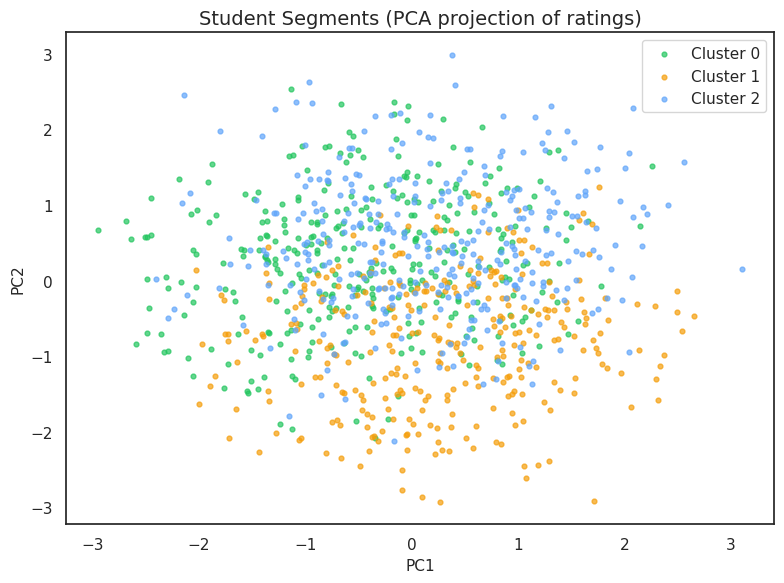

In [56]:
# Optional: PCA 2D visualization of clusters — paths fixed

import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Paths
base_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in globals() else os.getcwd()
DATA   = os.path.join(base_dir, "data")
ASSETS = os.path.join(base_dir, "assets")
os.makedirs(ASSETS, exist_ok=True)

# Load clean data from data/
df = pd.read_csv(os.path.join(DATA, "student_feedback_clean.csv"))

rating_cols = [c for c in df.columns if c not in ['student_id','overall_satisfaction']]
X = df[rating_cols].values
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42).fit(X_scaled)
labels = kmeans.labels_

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
palette = ['#22c55e', '#f59e0b', '#60a5fa']
for c in range(3):
    idx = labels == c
    plt.scatter(X_pca[idx,0], X_pca[idx,1], s=12, label=f'Cluster {c}', alpha=0.7, c=palette[c])

plt.title('Student Segments (PCA projection of ratings)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.tight_layout()

# Save into assets/
out_path = os.path.join(ASSETS, "fig_clusters_pca.png")
plt.savefig(out_path, dpi=300, bbox_inches='tight')
print(f"Saved: {out_path} ✅")

plt.show()


## 🎯 Key Performance Indicators

In [55]:
import os
import pandas as pd

# Paths
base_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in globals() else os.getcwd()
DATA = os.path.join(base_dir, "data")
os.makedirs(DATA, exist_ok=True)

# Load clean data from data/
df = pd.read_csv(os.path.join(DATA, "student_feedback_clean.csv"))

rating_cols = [c for c in df.columns if c not in ['student_id','overall_satisfaction']]

kpis = {
    'Total responses': [len(df)],
    'Overall mean': [round(df['overall_satisfaction'].mean(), 2)],
    'Overall median': [round(df['overall_satisfaction'].median(), 2)],
    'Overall std': [round(df['overall_satisfaction'].std(), 2)],
    'Top category': [df[rating_cols].mean().idxmax()],
    'Top category mean': [round(df[rating_cols].mean().max(), 2)],
    'Bottom category': [df[rating_cols].mean().idxmin()],
    'Bottom category mean': [round(df[rating_cols].mean().min(), 2)],
}

bands = pd.cut(
    df['overall_satisfaction'], bins=[0,4,6,8,10],
    labels=['Poor (1-4)','Fair (4-6)','Good (6-8)','Excellent (8-10)'],
    include_lowest=True
)
counts = bands.value_counts().reindex(['Poor (1-4)','Fair (4-6)','Good (6-8)','Excellent (8-10)']).fillna(0)
pct = (counts/len(df)*100).round(1)

kpis.update({
    'Poor (1-4) %': [pct['Poor (1-4)']],
    'Fair (4-6) %': [pct['Fair (4-6)']],
    'Good (6-8) %': [pct['Good (6-8)']],
    'Excellent (8-10) %': [pct['Excellent (8-10)']],
})

kpi_df = pd.DataFrame(kpis)
display(kpi_df)

# Save KPI CSV into data/
out_path = os.path.join(DATA, "kpi_summary.csv")
kpi_df.to_csv(out_path, index=False)
print(f"Saved: {out_path} ✅")


,Total responses,Overall mean,Overall median,Overall std,Top category,Top category mean,Bottom category,Bottom category mean,Poor (1-4) %,Fair (4-6) %,Good (6-8) %,Excellent (8-10) %
0,1001,5.92,5.88,0.89,well_versed_with_the_subject,7.5,degree_of_difficulty_of_assignments,5.43,1.6,55.9,41.8,0.7


Saved: C:\Users\Huzaif\College event feedback Analysis\data\kpi_summary.csv ✅
